In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

((100, 1), (100, 1))

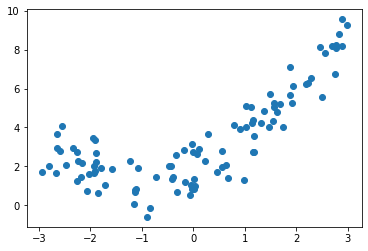

In [47]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 1/2 * X**2 + X + 2 + np.random.randn(m,1)
plt.scatter(X, y)
X.shape, y.shape

In [48]:
from sklearn.preprocessing import PolynomialFeatures
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polyFeatures.fit_transform(X)

from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X_poly,y)
linReg.intercept_, linReg.coef_


(array([1.88600831]), array([[0.99998037, 0.47855863]]))

Learning Curves :-

Plots of the model's performance on the training and validation set as a function of the training set size.
To create one, just train the model several times on different sized subsets of the training set.

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plotLearningCurves(Model, X, y):
    XTrain, xVali, yTrain, yVali = train_test_split(X,y, test_size=0.2)
    trainErrors= []
    valiErrors= []

    for m in range(1, len(XTrain)):
        Model.fit(XTrain[:m], yTrain[:m])
        yTrainPreds = Model.predict(XTrain[:m])
        yValiPreds = Model.predict(xVali[:m])
        trainErrors.append(mean_squared_error(yTrain[:m], yTrainPreds[:m]))
        valiErrors.append(mean_squared_error(yVali[:m], yValiPreds[:m]))

    plt.plot(np.sqrt(trainErrors), "r-", label="Train Errors")
    plt.plot(np.sqrt(valiErrors), "b-", label="Validation Errors")
    plt.legend()
    plt.show

In [50]:
from sklearn.model_selection import cross_validate

myVal = cross_validate(linReg, X=X, y=y, scoring="neg_root_mean_squared_error", cv=5)
testScore = myVal["test_score"]
print(testScore)

[-1.61062711 -1.50986469 -1.76223122 -1.50683566 -1.5512062 ]


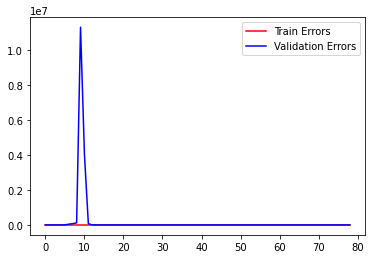

In [51]:
from sklearn.pipeline import Pipeline
degree = 10
myPipeline = Pipeline([
    ("polyFeatures", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linReg", LinearRegression())
])

model = myPipeline.fit(X,y)
plotLearningCurves(model, X, y)

Regularizing a model means to reduce it's overfitting issues and constrain the model(Such as removing degrees of polynomial when converting features)

For linear models, regularization is typically done by constraining the n_weights of the models.